In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split



In [36]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df['next_event'] = df['concept:name'].shift(-1)
df['next_case'] = df['case:concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
# df = df[df['case:concept:name'] == df['next_case']]
#df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', format='')
# df['day'] = df['datetime'].dt.day
# df['hour'] =  df['datetime'].dt.hour
# df['minute'] =  df['datetime'].dt.minute
# df['month'] =  df['datetime'].dt.month
#df = df.iloc[:20000]
df.iloc[:10]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition']]
dfy = df[['next_event']]
valy = dfy
dummies = pd.get_dummies(dfx)
dfy = pd.get_dummies(dfy)
dfx = dummies
#dfx = dummies.join(df[['day, hour', 'minute', 'month']])
trainlen = int(len(df)*0.8)
# dfx.iloc[:10]
# dfx = dfx.to_numpy()
# dfy = dfy.to_numpy()
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.iloc[:10]

262200


,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,next_event,next_case,previous_event,pp_event,ppp_event,p_lifecycle:transition
0,112.0,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_PARTLYSUBMITTED,173688.0,NaN,NaN,NaN,NaN
1,112.0,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_PREACCEPTED,173688.0,A_SUBMITTED,NaN,NaN,COMPLETE
2,112.0,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Completeren aanvraag,173688.0,A_PARTLYSUBMITTED,A_SUBMITTED,NaN,COMPLETE
3,112.0,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Completeren aanvraag,173688.0,A_PREACCEPTED,A_PARTLYSUBMITTED,A_SUBMITTED,COMPLETE
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_ACCEPTED,173688.0,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,SCHEDULE
5,10862.0,COMPLETE,A_ACCEPTED,2011-10-01 11:42:43.308000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,O_SELECTED,173688.0,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,START
6,10862.0,COMPLETE,O_SELECTED,2011-10-01 11:45:09.243000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_FINALIZED,173688.0,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,COMPLETE
7,10862.0,COMPLETE,A_FINALIZED,2011-10-01 11:45:09.243000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,O_CREATED,173688.0,O_SELECTED,A_ACCEPTED,W_Completeren aanvraag,COMPLETE
8,10862.0,COMPLETE,O_CREATED,2011-10-01 11:45:11.197000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,O_SENT,173688.0,A_FINALIZED,O_SELECTED,A_ACCEPTED,COMPLETE
9,10862.0,COMPLETE,O_SENT,2011-10-01 11:45:11.380000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Nabellen offertes,173688.0,O_CREATED,A_FINALIZED,O_SELECTED,COMPLETE


In [37]:

df.iloc[:10]
x_train

<tf.Tensor: shape=(209760, 102), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)>

In [38]:
y_test[:1]

<tf.Tensor: shape=(1, 24), dtype=uint8, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0]], dtype=uint8)>

In [39]:
#df['datetime'] = pd.to_datetime(df['time:timestamp'])

In [40]:
#df['datetime'][1].year

In [41]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [42]:
y_train[:1]

<tf.Tensor: shape=(1, 24), dtype=uint8, numpy=
array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=uint8)>

In [43]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(102,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(36, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(24)
])

In [44]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.02374141, -0.02568426,  0.09405239, -0.01722599, -0.00112079,
        -0.01826655,  0.10527253,  0.17067467, -0.01155277,  0.14968033,
        -0.04499144, -0.07451061, -0.06831066,  0.04586565, -0.09884699,
         0.08621811,  0.15484184,  0.04247379,  0.00084237, -0.03091098,
        -0.0741122 ,  0.06593572,  0.04119142, -0.07076634]],
      dtype=float32)

In [45]:
tf.nn.softmax(predictions).numpy()

array([[0.03990211, 0.03982466, 0.04489035, 0.04016293, 0.040815  ,
        0.04012116, 0.04539686, 0.04846516, 0.04039143, 0.04745827,
        0.03906313, 0.03792688, 0.03816275, 0.04277852, 0.03701501,
        0.04454004, 0.04770386, 0.04263367, 0.04089521, 0.03961705,
        0.03794198, 0.04364577, 0.04257903, 0.03806915]], dtype=float32)

In [46]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [47]:
loss_fn(y_train[:1], predictions).numpy()

0.69780356

In [48]:
model.compile(optimizer='Adamax',
              loss=loss_fn,
              metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
820/820 [==============================] - 3s 3ms/step - loss: 0.2087 - accuracy: 0.7701
Epoch 2/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0364 - accuracy: 0.8396
Epoch 3/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0301 - accuracy: 0.8470
Epoch 4/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0285 - accuracy: 0.8483
Epoch 5/10
820/820 [==============================] - 3s 3ms/step - loss: 0.0280 - accuracy: 0.8485
Epoch 6/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0277 - accuracy: 0.8486
Epoch 7/10
820/820 [==============================] - 3s 3ms/step - loss: 0.0275 - accuracy: 0.8495
Epoch 8/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0274 - accuracy: 0.8491
Epoch 9/10
820/820 [==============================] - 2s 3ms/step - loss: 0.0273 - accuracy: 0.8500
Epoch 10/10
820/820 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.8502

In [50]:
model.evaluate(x_test,  y_test, verbose=2)

1639/1639 - 2s - loss: 0.0308 - accuracy: 0.8412 - 2s/epoch - 1ms/step


[0.030812829732894897, 0.8411708474159241]

In [51]:
predictions = model(x_test).numpy()
predictions
tf.nn.softmax(predictions).numpy()

array([[8.1820939e-10, 2.6640622e-08, 3.4955839e-08, ..., 1.7851313e-08,
        9.9999964e-01, 1.2173067e-09],
       [3.8487862e-09, 4.8601759e-08, 7.0029764e-09, ..., 9.9999928e-01,
        2.5191380e-08, 3.3430432e-08],
       [4.6706274e-09, 1.9689642e-07, 7.3878283e-08, ..., 1.0743631e-07,
        9.9999619e-01, 3.4743415e-08],
       ...,
       [2.2215645e-04, 1.2340382e-05, 2.2251828e-05, ..., 6.3063526e-05,
        6.8784902e-05, 1.9245823e-05],
       [7.3508741e-11, 6.4293455e-09, 6.3985702e-08, ..., 1.1760770e-09,
        4.6757606e-08, 4.6567479e-09],
       [2.3091444e-09, 2.3386942e-10, 6.5413683e-09, ..., 3.2849325e-08,
        1.1952575e-08, 1.0057555e-08]], dtype=float32)

In [52]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [53]:
tf.nn.softmax(model.predict(x_train[:2]))

<tf.Tensor: shape=(2, 24), dtype=float32, numpy=
array([[3.18630491e-08, 2.00719938e-07, 4.54398403e-08, 5.89604170e-08,
        1.04066964e-06, 5.11981533e-08, 9.99993324e-01, 5.26590611e-07,
        1.23186325e-07, 1.01233518e-07, 1.76123720e-07, 1.56171254e-07,
        2.16576780e-07, 5.31558726e-08, 1.91573235e-07, 3.05524480e-07,
        1.23225092e-07, 4.38049881e-07, 2.78697570e-07, 7.14363750e-07,
        2.47163513e-07, 9.69540906e-07, 6.10515087e-07, 1.04955049e-07],
       [1.25671751e-04, 1.02391925e-04, 1.33209964e-04, 2.88781612e-05,
        2.02328563e-01, 5.42961970e-05, 1.34135280e-05, 4.22095776e-01,
        1.22626880e-05, 5.23654526e-05, 8.47491101e-05, 3.37243575e-04,
        2.01802304e-05, 1.23287055e-05, 8.58334461e-05, 2.43834415e-06,
        5.59936307e-05, 3.68851423e-01, 3.81795852e-03, 9.15534401e-05,
        1.27271970e-03, 9.26178909e-05, 2.95429491e-04, 3.27551534e-05]],
      dtype=float32)>

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 102)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 102)              408       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               13184     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 48)               

In [55]:
data = tf.nn.softmax(predictions).numpy()
columns

Index(['next_event_A_ACCEPTED', 'next_event_A_ACTIVATED',
       'next_event_A_APPROVED', 'next_event_A_CANCELLED',
       'next_event_A_DECLINED', 'next_event_A_FINALIZED',
       'next_event_A_PARTLYSUBMITTED', 'next_event_A_PREACCEPTED',
       'next_event_A_REGISTERED', 'next_event_A_SUBMITTED',
       'next_event_O_ACCEPTED', 'next_event_O_CANCELLED',
       'next_event_O_CREATED', 'next_event_O_DECLINED',
       'next_event_O_SELECTED', 'next_event_O_SENT', 'next_event_O_SENT_BACK',
       'next_event_W_Afhandelen leads', 'next_event_W_Beoordelen fraude',
       'next_event_W_Completeren aanvraag',
       'next_event_W_Nabellen incomplete dossiers',
       'next_event_W_Nabellen offertes', 'next_event_W_Valideren aanvraag',
       'next_event_W_Wijzigen contractgegevens'],
      dtype='object')

In [56]:
df = pd.DataFrame(data, columns=columns)
print(len(df))
df.dropna(inplace=True)
print(len(df))

52440
52440


In [57]:
predictions = pd.DataFrame(df.idxmax(axis=1), columns = ['prediction'])

In [58]:
validation = pd.DataFrame(valy.idxmax(axis=1), columns=['actual'])

In [59]:
validation.reset_index(inplace=True)

In [60]:
results = validation.join(predictions)

In [61]:
results.iloc[:10]

,index,actual,prediction
0,209760,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
1,209761,next_event_W_Nabellen offertes,next_event_W_Nabellen offertes
2,209762,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
3,209763,next_event_O_ACCEPTED,next_event_W_Valideren aanvraag
4,209764,next_event_A_APPROVED,next_event_A_APPROVED
5,209765,next_event_A_REGISTERED,next_event_A_REGISTERED
6,209766,next_event_A_ACTIVATED,next_event_A_ACTIVATED
7,209767,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
8,209768,next_event_A_SUBMITTED,next_event_A_SUBMITTED
9,209769,next_event_A_PARTLYSUBMITTED,next_event_A_PARTLYSUBMITTED


In [62]:
same=0
diff = 0
for value, row in results.iterrows():
    if row['prediction'] == row['actual']:
        same += 1
    else: diff += 1
accuracy = same / (diff+same) *100
accuracy

84.11708619374522

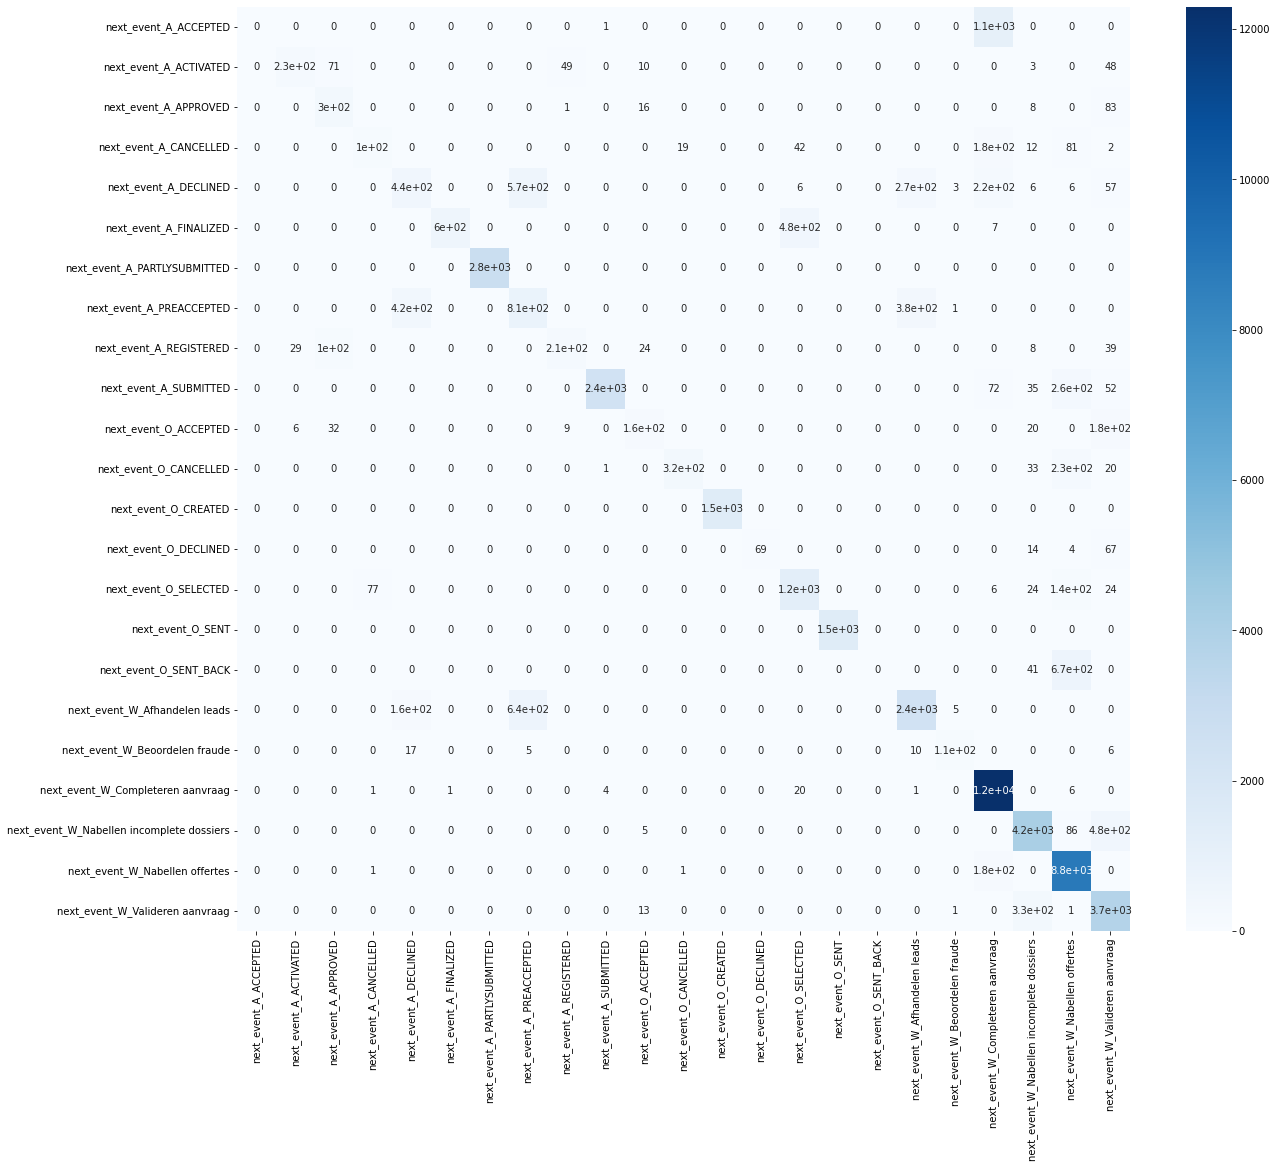

In [63]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
y_test = results['actual']
y_pred = results['prediction']
labels = list(np.unique(results['actual']))
a =  confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(20,17)) 
cmd = pd.DataFrame(a, index=labels, columns=labels)
sns.heatmap(cmd, annot=True, cmap='Blues', ax=ax)
fig.savefig('confusionmatrix.png', dpi=300)


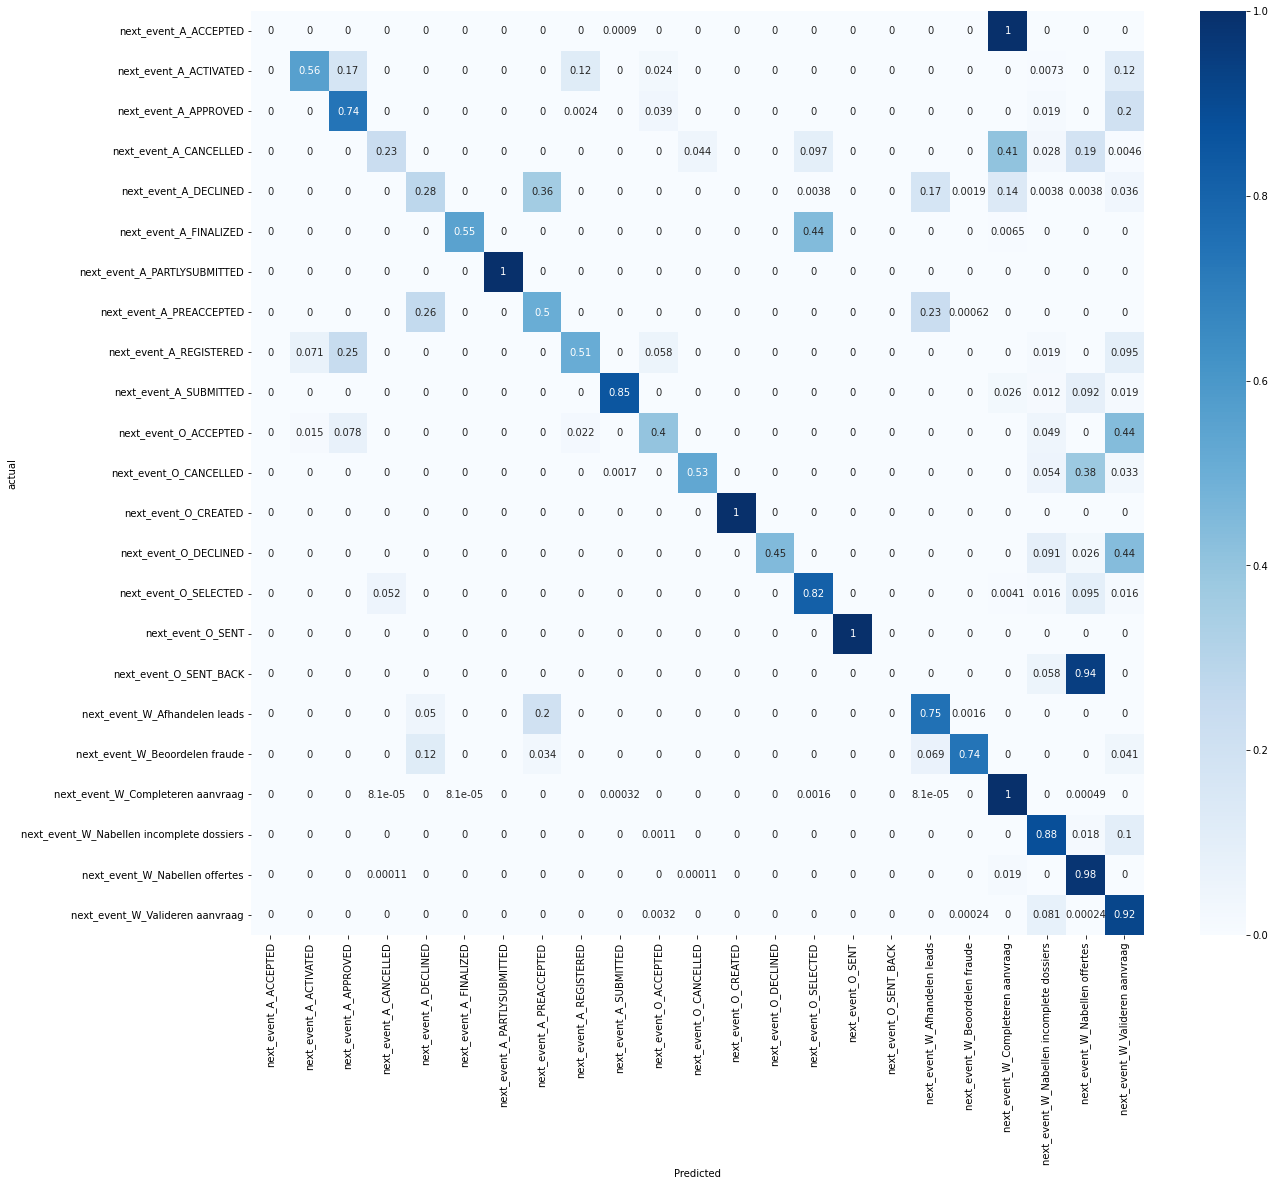

In [64]:
cmdn = cmd.div(cmd.sum(axis=1), axis=0)
cmdn
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cmdn, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('norm_confusion_matrix.png', dpi=300)

In [65]:
end = time.time()
total_time = end-start
print(total_time)

39.353679895401
